#  Intro

This notebook is to test population decoders, i.e. to decode one variable from one session.

Another notebook exists to run the same method for all sessions and multiple variabless.

---
# Setup

In [1]:
#%% Imports
import pandas as pd

from popy.decoding.population_decoders import run_decoder

from popy.io_tools import load_behavior, load_neural_data
from popy.behavior_data_tools import *
from popy.neural_data_tools import *
from popy.decoding.population_decoders import linear_decoding
from popy.plotting.plotting_tools import plot_keypoints


In [2]:
##% Plotting functions
def plot_decoding_results(res, n_extra_trials=(0, 0), title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    if title is not None:
        ax.set_title(title)

    colors = {'LPFC': 'tab:blue', 'MCC': 'grey'}
    linestyles = {'scores': '-', 'perm_mean +- 2std': '--'}

    for area in res.area.values:
        res_temp = res.sel(area=area)
        ax.plot(res_temp.time, res_temp.scores, label=area, alpha=.8, color=colors[area]) 
        
        # bold when significant (2 std)
        '''for i in range(res.scores.shape[0]-1):
            if res.scores[i] > res.perm_mean[i] + 2*res.perm_std[i]:
                ax.plot([res.time[i], res.time[i+1]], [res.scores[i], res.scores[i+1]], color='tab:red', alpha=.5, linewidth=4)'''
        #ax.plot(res.time[res.scores > res.perm_mean + 2*res.perm_std], res.scores[res.scores > res.perm_mean + 2*res.perm_std], color='tab:blue', alpha=.8, linewidth=5)

        ax.plot(res_temp.time, res_temp.perm_mean, alpha=.8, linestyle='--', color=colors[area])
        ax.fill_between(res_temp.time, res_temp.perm_mean - res_temp.perm_std, res_temp.perm_mean + res_temp.perm_std, alpha=.2,  color=colors[area])
            
    plot_keypoints(ax, n_extra_trials=n_extra_trials, fontsize=8, rotation=70)
    ax.grid(axis='x', alpha=.5)
    # add linestyles to legend in black
    for key, value in linestyles.items():
        ax.plot([], [], linestyle=value, color='k', label=key)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # limits of the plot by default
    

def plot_multiple_decoding_results(reses, n_extra_trials=(0, 0), title=None, ax=None):
    fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

    areas =['LPFC', 'MCC']
    for label, res in reses.items():
        for i, ax in enumerate(axs):
            res_temp = res.sel(area=areas[i])
            axs[i].plot(res_temp.time, res_temp.scores, label=label, alpha=.8)   
    for i, ax in enumerate(axs):
        ax.set_title(areas[i])
        plot_keypoints(ax, n_extra_trials=n_extra_trials, fontsize=8, rotation=70)
        ax.grid(axis='x', alpha=.5)
        ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    if title is not None:
        fig.suptitle(title)
    fig.tight_layout()

---
# Section 1: Main

In [8]:
monkey, session = 'ka', '130622'

# load neural data
neural_data = load_neural_data(monkey, session, hz=1000)
neural_data

<xarray.Dataset>
Dimensions:           (unit: 46, time: 2872420)
Coordinates:
  * unit              (unit) object 'LPFC_06_01' 'LPFC_07_02' ... 'MCC_12_02'
  * time              (time) float64 9.16 9.161 9.162 ... 2.882e+03 2.882e+03
    unit_id_original  (unit) int64 68 69 71 74 26 30 ... 33 104 105 101 106 48
    channel           (unit) int64 6 7 7 8 8 9 9 10 ... 9 10 10 11 11 11 12 12
    monkey            (unit) object 'ka' 'ka' 'ka' 'ka' ... 'ka' 'ka' 'ka' 'ka'
    session           (unit) object '130622' '130622' ... '130622' '130622'
    area              (unit) object 'LPFC' 'LPFC' 'LPFC' ... 'MCC' 'MCC' 'MCC'
    subregion         (unit) object 'vLPFC' 'vLPFC' 'vLPFC' ... 'MCC' 'MCC'
    trial_id          (time) float64 nan nan nan nan nan ... nan nan nan nan nan
    epoch_id          (time) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    spike_trains      (unit, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    bin_size:  0.001

In [3]:
monkey, session = 'po', '011220'

PARAMS = {
    'conditions': ['shift_value'], #[f'shift_value_{alpha:.2f}' for alpha in np.linspace(.05, .95, 19)],  # Conditions to decode
    'group_target': 'target',
    'K_fold': None,
    'step_len': .1,
    'n_perm': 10, 
    'n_extra_trials': (-1, 0),
}

res_xr_target, _ = run_decoder(monkey, session, PARAMS, n_jobs=-1) #‹#####_decoder(monkey, session, PARAMS, n_jobs=-1)


PARAMS = {
    'conditions': ['shift_value'], #[f'shift_value_{alpha:.2f}' for alpha in np.linspace(.05, .95, 19)],  # Conditions to decode
    'group_target': 'target_shuffled',
    'K_fold': None,
    'step_len': .1,
    'n_perm': 10, 
    'n_extra_trials': (-1, 0),
}

res_xr_baseline, _ = run_decoder(monkey, session, PARAMS, n_jobs=-1)


PARAMS = {
    'conditions': ['shift_value'], #[f'shift_value_{alpha:.2f}' for alpha in np.linspace(.05, .95, 19)],  # Conditions to decode
    'group_target': None,
    'K_fold': 10,
    'step_len': .1,
    'n_perm': 10, 
    'n_extra_trials': (-1, 0),
}

res_xr_original, _ = run_decoder(monkey, session, PARAMS, n_jobs=-1)


Running for monkey po and session 011220
Target 1.0: 67 trials
Target 2.0: 56 trials
Target 3.0: 85 trials


KeyboardInterrupt: 

In [ ]:
res_xr_baseline

<xarray.Dataset>
Dimensions:    (session: 1, target: 1, time: 150, area: 2)
Coordinates:
  * target     (target) <U50 'shift_value'
  * area       (area) <U10 'LPFC' 'MCC'
  * time       (time) float64 -7.5 -7.4 -7.3 -7.2 -7.1 ... 7.0 7.1 7.2 7.3 7.4
  * session    (session) <U9 'po_011220'
    monkey     (session) <U2 'po'
Data variables:
    scores     (session, target, time, area) float64 0.02303 -0.1416 ... 0.067
    pvals      (session, target, time, area) float64 0.09091 0.09091 ... 0.09091
    perm_mean  (session, target, time, area) float64 -0.06252 -0.281 ... -0.4284
    perm_std   (session, target, time, area) float64 0.04286 0.1275 ... 0.1828
Attributes:
    conditions:      ['shift_value']
    group_target:    target_shuffled
    K_fold:          None
    step_len:        0.1
    n_perm:          10
    n_extra_trials:  (-1, 0)

In [ ]:
'''# colors are from red to green gradient
targets = res_xr.target.values
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(targets)))
for area in res_xr.area.values:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.suptitle(f'{monkey}_{session} - {area}')
    for j, target_temp in enumerate(targets):
        ax = axs[0]
        data_temp = res_xr.sel(session=f'{monkey}_{session}', target=target_temp, area=area)

        ax.plot(data_temp.time, data_temp.scores, label=target_temp, color=colors[j])
        #ax.fill_between(data_temp.time, data_temp.scores - data_temp.cv_std, data_temp.scores + data_temp.cv_std, alpha=.2, color='tab:blue')

        #ax.plot(data_temp.time, data_temp.perm_mean, color='black', linestyle='--')
        #ax.fill_between(data_temp.time, data_temp.perm_mean - 3*data_temp.perm_std, data_temp.perm_mean + 3*data_temp.perm_std, alpha=.2, color='black')

        #ax.plot(data_temp.time, data_temp.cv_std, color='tab:orange', alpha=.5, label='std of CVs')

        add_label = True
        for i in range(data_temp.time.shape[0]-1):
            if data_temp.pvals[i] < .001:
                ax.plot([data_temp.time[i], data_temp.time[i+1]], [.6, .6], color='tab:red', label='p < .005' if add_label else None)
                add_label = False 


        plot_keypoints(ax, n_extra_trials=PARAMS['n_extra_trials'], fontsize=8, rotation=70)
        ax.grid(axis='x', alpha=.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
        ax.set_title(f'Area: {area}\ndecoding results in time')
        ax.set_ylabel('R2')

        ax.set_ylim([-.1, .6])
        ax.set_xlim([1.5, 5])

        ax = axs[1]
        t_interest = 3.5
        alpha = float(target_temp.split('_')[-1])
        data_temp = res_xr.sel(session=f'{monkey}_{session}', target=target_temp, area=area)
        data_temp = data_temp.sel(time=t_interest, method='nearest')
        value = data_temp.scores

        ax.scatter(alpha, value, color=colors[j], label=target_temp.split('_')[-1][:4], marker='o')

        ax.set_xlabel('alpha')
        ax.set_ylabel('R2')
        ax.set_title(f'Area: {area}\nR2 at t={t_interest}')
        ax.grid(axis='x', alpha=.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title='alpha')

    axs[1].axvline(.41, color='tab:red', linestyle='--', alpha=.5, label='alpha fit on monkey')
    axs[1].text(.41, axs[1].get_ylim()[0], 'alpha fit on behav', rotation=90, verticalalignment='bottom', horizontalalignment='right', color='tab:red')

    fig.tight_layout()
    fig.show()
'''

"# colors are from red to green gradient\ntargets = res_xr.target.values\ncolors = plt.cm.RdYlGn(np.linspace(0, 1, len(targets)))\nfor area in res_xr.area.values:\n    fig, axs = plt.subplots(1, 2, figsize=(10, 5))\n    plt.suptitle(f'{monkey}_{session} - {area}')\n    for j, target_temp in enumerate(targets):\n        ax = axs[0]\n        data_temp = res_xr.sel(session=f'{monkey}_{session}', target=target_temp, area=area)\n\n        ax.plot(data_temp.time, data_temp.scores, label=target_temp, color=colors[j])\n        #ax.fill_between(data_temp.time, data_temp.scores - data_temp.cv_std, data_temp.scores + data_temp.cv_std, alpha=.2, color='tab:blue')\n\n        #ax.plot(data_temp.time, data_temp.perm_mean, color='black', linestyle='--')\n        #ax.fill_between(data_temp.time, data_temp.perm_mean - 3*data_temp.perm_std, data_temp.perm_mean + 3*data_temp.perm_std, alpha=.2, color='black')\n\n        #ax.plot(data_temp.time, data_temp.cv_std, color='tab:orange', alpha=.5, label='std of

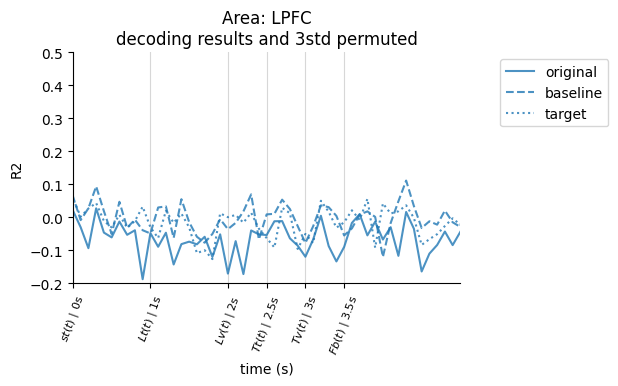

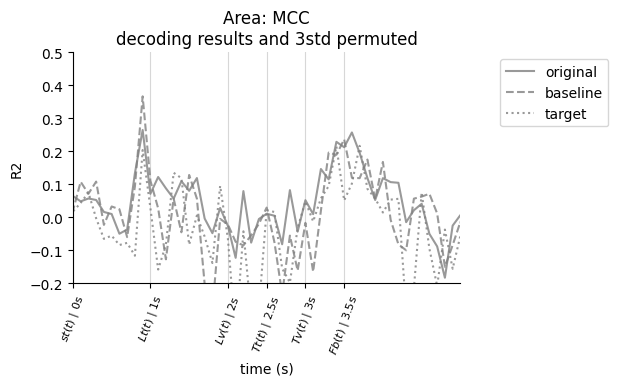

In [ ]:
# plot results

areas = res_xr_target.area.values

linestyles = {'baseline': '--', 'target': ':', 'original': '-'}

for area in areas:
    fig, ax = plt.subplots(figsize=(5, 3))

    for res_xr, label in zip([res_xr_original, res_xr_baseline, res_xr_target, ], ['original', 'baseline', 'target']):
        #if not label == 'original': continue
        for t, target in enumerate(PARAMS['conditions']):
            data_temp = res_xr.sel(session=f'{monkey}_{session}', target=target, area=area)

            ax.plot(data_temp.time, data_temp.scores, label=label, color='tab:blue' if area == 'LPFC' else 'grey', alpha=.8, linestyle=linestyles[label])
            #ax.fill_between(data_temp.time, data_temp.scores - data_temp.cv_std, data_temp.scores + data_temp.cv_std, alpha=.2, color='tab:blue')

            #ax.plot(data_temp.time, data_temp.perm_mean, color='black', linestyle='--')
            #ax.fill_between(data_temp.time, data_temp.perm_mean - 2*data_temp.perm_std, data_temp.perm_mean + 2*data_temp.perm_std, alpha=.2, color='black')

        #ax.plot(data_temp.time, data_temp.cv_std, color='tab:orange', alpha=.5, label='std of CVs')

        add_label = True
        for i in range(data_temp.time.shape[0]-1):
            if data_temp.pvals[i] < .001:
                ax.plot([data_temp.time[i], data_temp.time[i+1]], [.6, .6], color='tab:red', label='p < .005' if add_label else None)
                add_label = False 

        ax.set_ylim([-.2, .5])

        plot_keypoints(ax, n_extra_trials=PARAMS['n_extra_trials'], fontsize=8, rotation=70)
        ax.grid(axis='x', alpha=.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
        ax.set_title(f'Area: {area}\ndecoding results and 3std permuted')
        ax.set_ylabel('R2')
        ax.set_xlim([0, 5])